In [82]:
%pip install pandas scikit-learn imblearn matplotlib plotly nbformat seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [84]:
test = pd.read_csv("./Data/test.csv")
train = pd.read_csv("./Data/train.csv")

In [85]:
train['education']=train['education'].fillna(train.education.mode()[0])
test['education']=test['education'].fillna(test.education.mode()[0])

#fill the missing values in previous_year_rating
train['previous_year_rating']=train['previous_year_rating'].fillna(0)
test['previous_year_rating']=test['previous_year_rating'].fillna(0)

In [86]:
# df = pd.concat([train, test], axis=0) 
df = train.copy()
df.size

767312

In [87]:
df = df.drop_duplicates()


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [89]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [90]:
df.interpolate(inplace=True)

C:\Users\Kishore\AppData\Local\Temp\ipykernel_13472\471562723.py:1: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.



In [91]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [92]:
df.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

### No of Unique Values

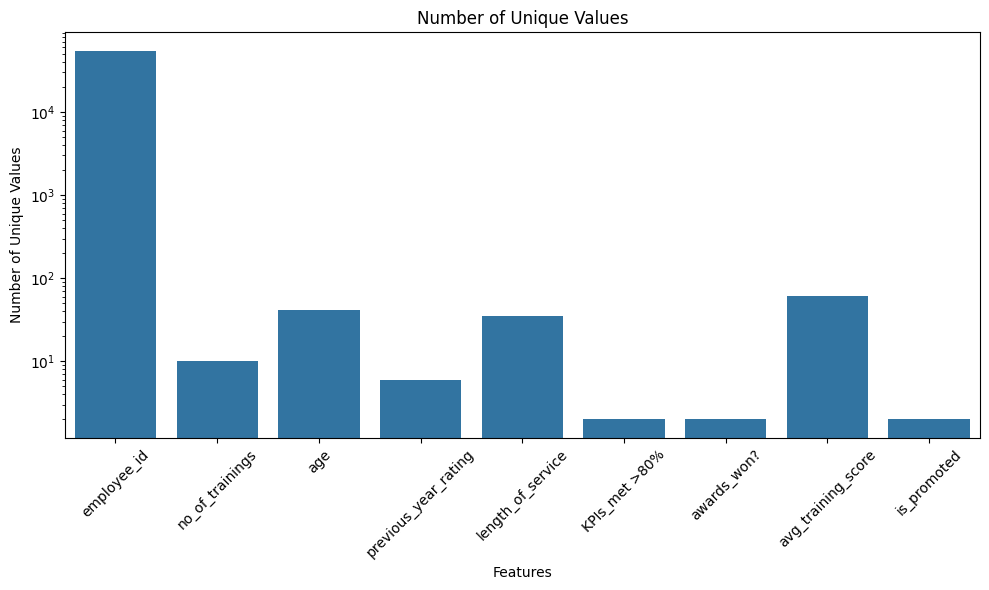

In [103]:
unique_values = train.select_dtypes(include='number').nunique()
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_values.index, y=unique_values.values)
plt.title('Number of Unique Values')
plt.xlabel('Features')
plt.ylabel('Number of Unique Values')
plt.yscale('log')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Education status - Awards won

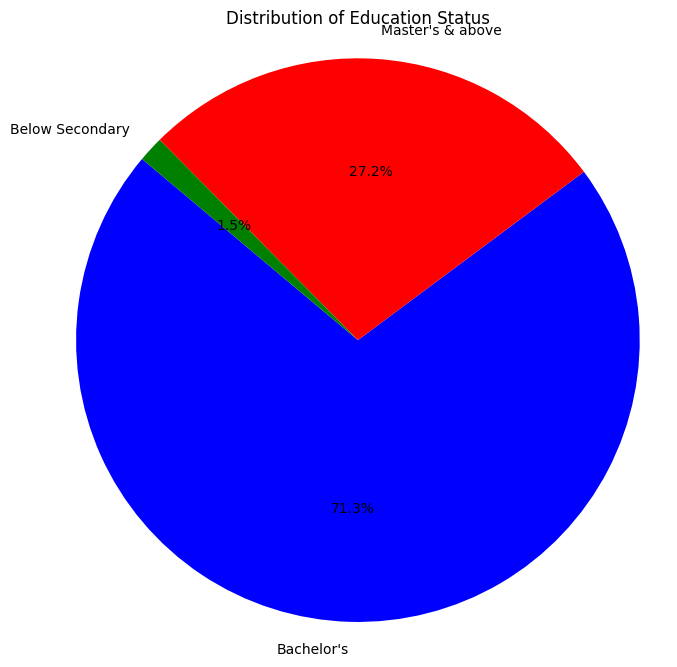

In [102]:
plt.figure(figsize=(8, 8))
education_counts = df['education'].value_counts()
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'red', 'green', 'orange'])
plt.title('Distribution of Education Status')
plt.axis('equal')
plt.show()

### Number of employess and their education status - Promotion

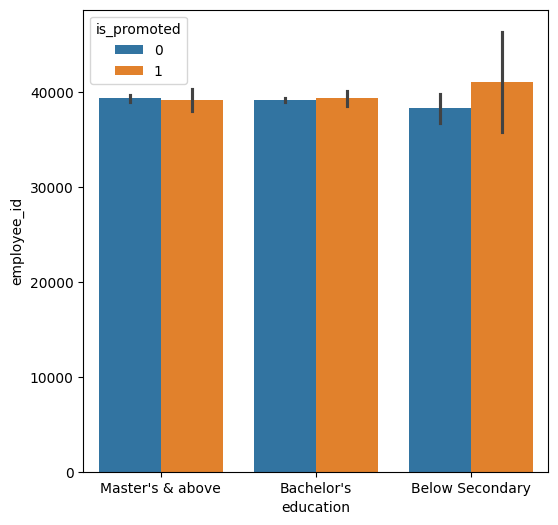

In [99]:
plt.figure(figsize=(6,6))
sns.barplot(x='education',y='employee_id',hue='is_promoted',data=df)
plt.show()

### Gender Distribution

C:\Users\Kishore\AppData\Local\Temp\ipykernel_13472\3684969823.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




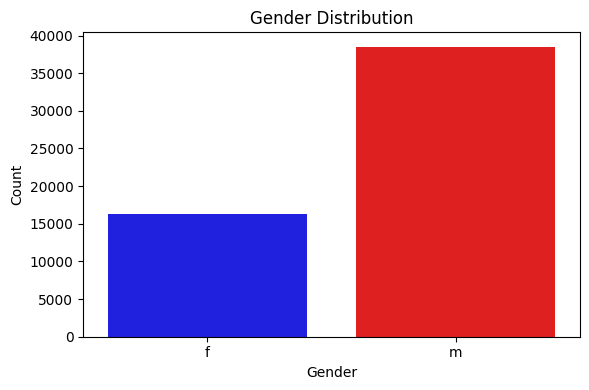

In [104]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df, palette=['blue', 'red'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Length of Service by Recruitment Channel

C:\Users\Kishore\AppData\Local\Temp\ipykernel_13472\4216018081.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




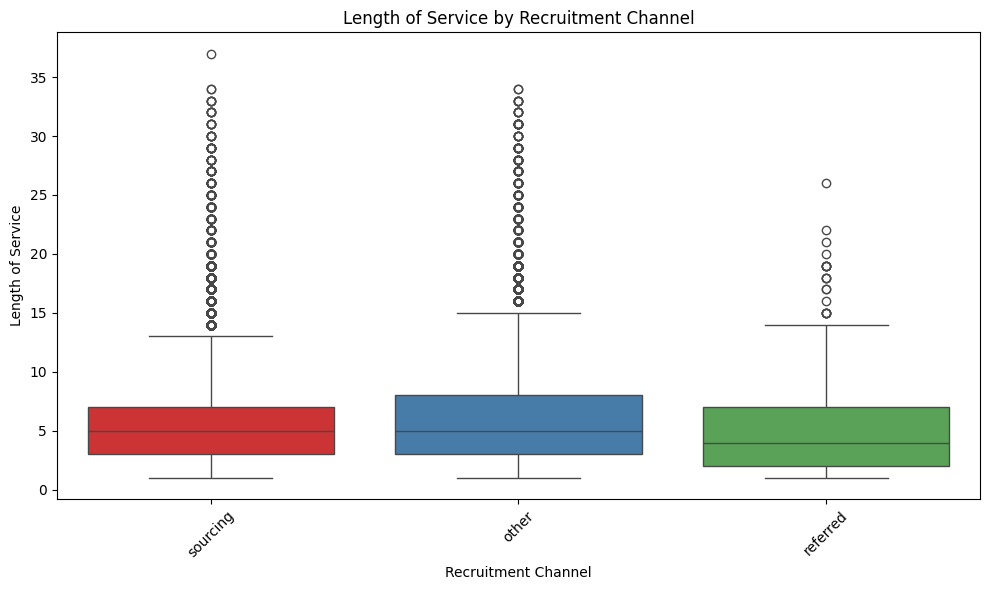

In [105]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='recruitment_channel', y='length_of_service', data=train, palette='Set1')
plt.title('Length of Service by Recruitment Channel')
plt.xlabel('Recruitment Channel')
plt.ylabel('Length of Service')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Age Distribution by Education

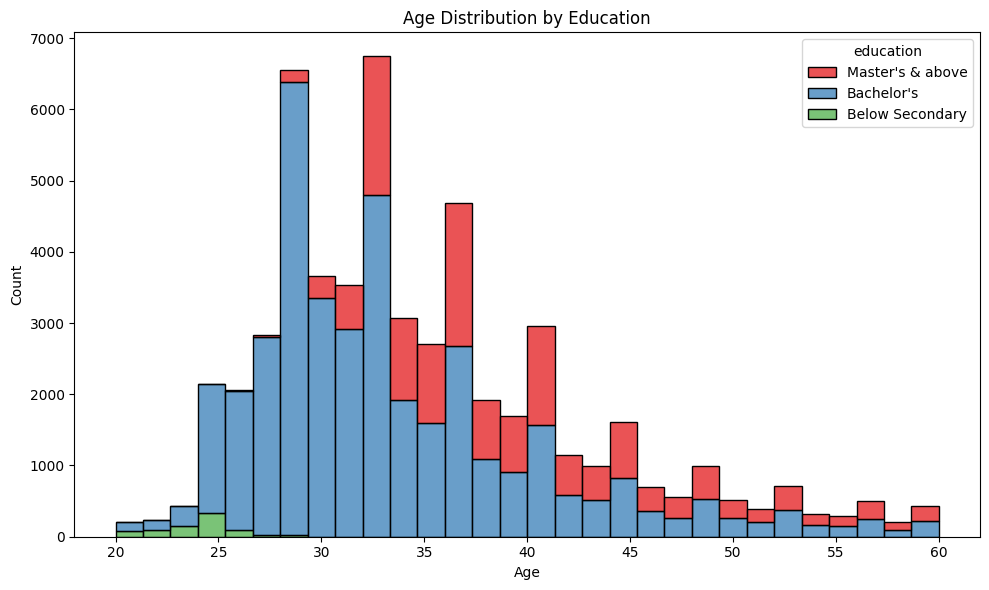

In [106]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='age', hue='education', multiple='stack', palette='Set1', bins=30)
plt.title('Age Distribution by Education')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()